In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score
%matplotlib inline

In [3]:
diab_df=pd.read_csv('/content/pima-indians-diabetes.csv')

In [4]:
diab_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diab_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diab_df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
diab_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

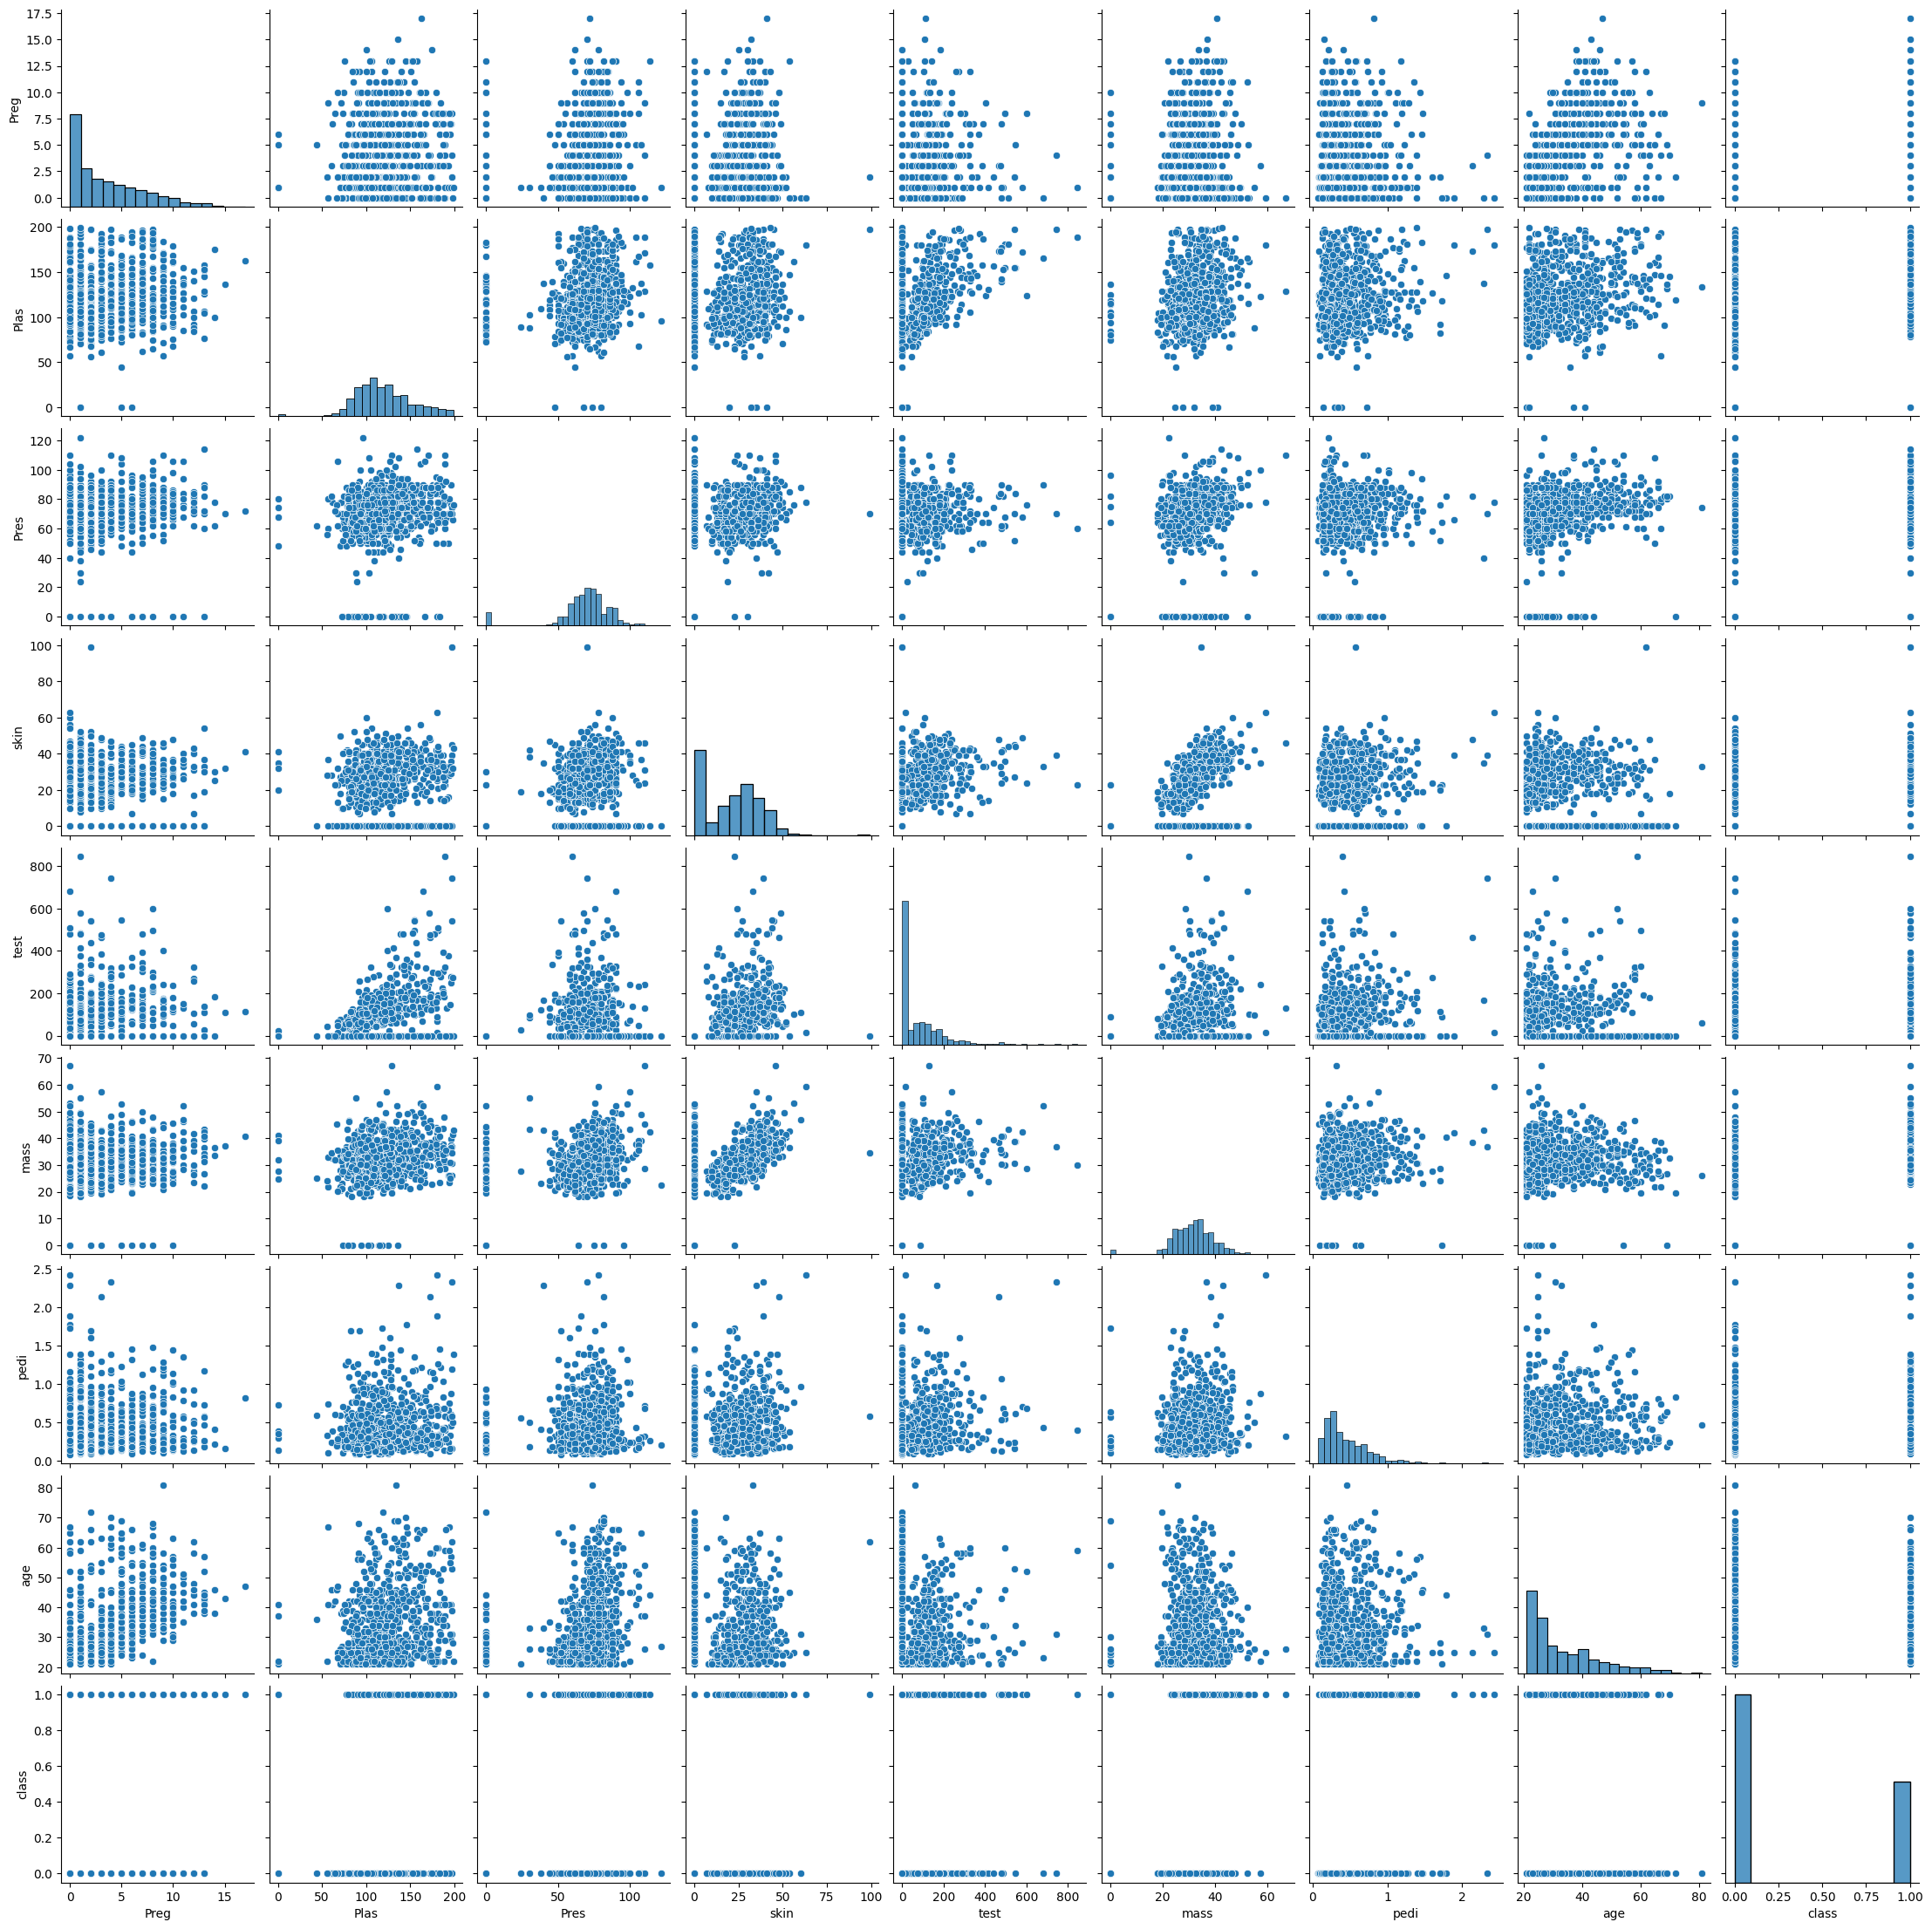

In [10]:
sns.pairplot(diab_df)

<Axes: >

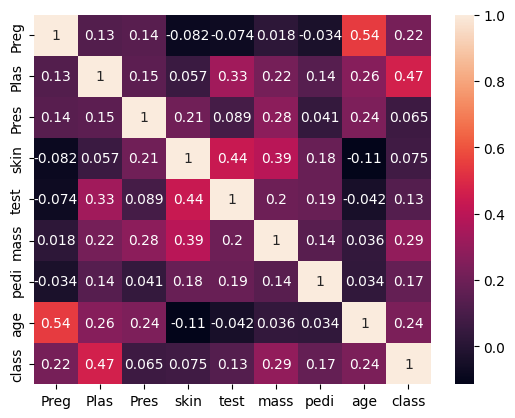

In [12]:
sns.heatmap(diab_df.corr(),annot=True)

In [13]:
x=diab_df.drop('class',axis=1)
y=diab_df['class']

In [15]:
x

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
118,4,97,60,23,0,28.2,0.443,22
205,5,111,72,28,0,23.9,0.407,27
506,0,180,90,26,90,36.5,0.314,35
587,6,103,66,0,0,24.3,0.249,29
34,10,122,78,31,0,27.6,0.512,45
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [23]:
x_test

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
247,0,165,90,33,680,52.3,0.427,23
189,5,139,80,35,160,31.6,0.361,25
139,5,105,72,29,325,36.9,0.159,28
518,13,76,60,0,0,32.8,0.180,41


In [24]:
y_train

118    0
205    0
506    1
587    0
34     0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 576, dtype: int64

In [25]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
247    0
189    1
139    0
518    0
629    0
Name: class, Length: 192, dtype: int64

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
for i,col in enumerate(x_train):
    print(f'The coefficient of {col} attribute is {model.coef_[0][i]}')

The coefficient of Preg attribute is 0.11743530442174024
The coefficient of Plas attribute is 0.035563023063134684
The coefficient of Pres attribute is -0.014716105279467668
The coefficient of skin attribute is -0.0025805792626269588
The coefficient of test attribute is -0.0006739564024165985
The coefficient of mass attribute is 0.0925243581473413
The coefficient of pedi attribute is 0.4725271617189473
The coefficient of age attribute is 0.013933921294681404


In [37]:
model.intercept_

array([-8.14919978])

In [40]:
yhat=model.predict(x_test)

In [43]:
mse=mean_squared_error(y_test,yhat)
rmse=np.sqrt(mse)
rmse

0.4732423621500228

In [47]:
model.score(x_train,y_train)

0.7708333333333334

In [48]:
model.score(x_test,y_test)

0.7760416666666666

In [50]:
accuracy_score(y_test,yhat)

0.7760416666666666

In [51]:
diab_df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [53]:
f1_score(y_test,yhat)

0.6504065040650405